# Simple Symmetric Random Walk

Let's first simulate the path of simple symmetric random walk (SSRW) denoted $\left\{S_n\right\}$. By definition, $S_0 = 0,\forall n\geq 1,S_n = \xi_1 + ...+ \xi_n$ where $\xi_1,\xi_2,...$ are $i.i.d.$ increments taking $\pm 1$ with probability $\frac{1}{2}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## First hitting time to level $k$

Here we focus on the distribution of $T_k$, the first hitting time of SSRW to $k\in\left\{1,2,3,...\right\}$. The rigorous definition of $T_k$ is the following
$$T_k = \inf\left\{n\geq 1:S_n = k\right\}$$
as what we have done previously, we first try to build up the empirical distribution of $T_k$ through Monte Carlo and then compare it with its exact distribution.

In [2]:
# The following function returns a single sample of T_k
def get_SSRW_hittime(k,trunc):
    
    # SSRW starts from value 0 at time 0
    SSRW_val = 0
    current_time = 0
    
    # Simulate SSRW until it hits value k
    # Here we add an upper time limit (why do we do that?)
    while SSRW_val != k and current_time <= trunc:
        # Proceed to the next time
        SSRW_val = SSRW_val + np.random.choice([-1, 1], p = [0.5, 0.5])
        current_time = current_time + 1
        
    # Record the hitting time
    hittime = current_time
    
    return hittime

Let's just take $k = 1$ and try to run the function above.

In [13]:
k = 1
trunc = 100
get_SSRW_hittime(k,trunc)

1

Build up histogram to see the empirical distribution of $T_1$ based on $10000$ simulations.

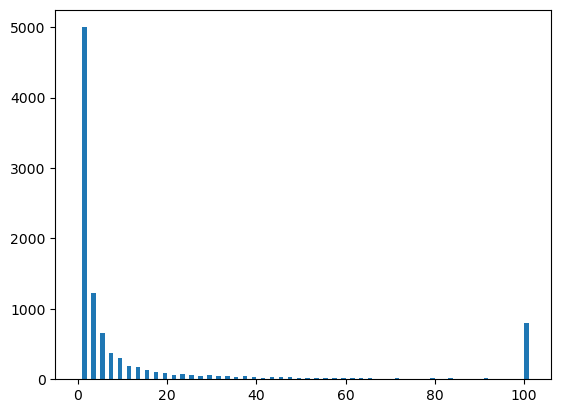

In [4]:
np.random.seed(20) # Seed

# Monte Carlo simulations
hittime_list = list()
for _ in range(10000):
    hittime = get_SSRW_hittime(k,trunc)
    hittime_list.append(hittime)

# Build up histogram
max_time = np.max(hittime_list)
_ = plt.hist(hittime_list, bins = np.arange(max_time + 1))

There's an interesting phenomenon one can observe. The empirical distribution of $T_1$ has a heavy tail, the evidence is that an non-negligible portion of samples of $T_1$ are taking value $100$ (the value we have selected in order to avoid a very long waiting time).

Since the empirical distribution has a heavy tail, we would like to investigate $\mathbb{E}T_1$. Let's construct a running Monte Carlo estimate of this.

15.0456


Text(0, 0.5, 'Monte Carlo Estimate')

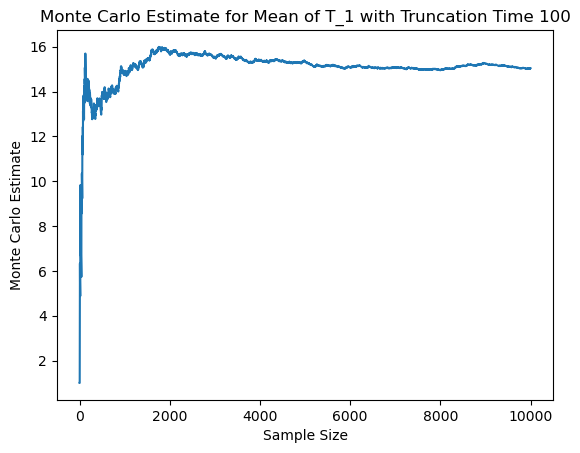

In [5]:
# Running MC estimate of the mean of T_1
run_est = np.cumsum(hittime_list) / np.arange(1,10001)
print(run_est[-1])
plt.plot(run_est)
plt.title('Monte Carlo Estimate for Mean of T_1 with Truncation Time 100')
plt.xlabel('Sample Size')
plt.ylabel('Monte Carlo Estimate')

50.0374


Text(0, 0.5, 'Monte Carlo Estimate')

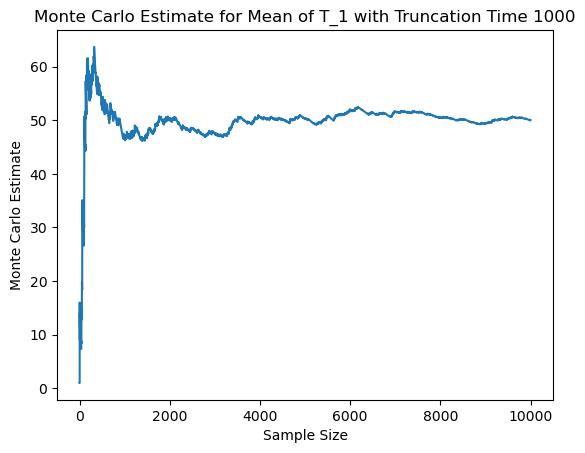

In [6]:
trunc = 1000

# Monte Carlo simulations
hittime_list = list()
for _ in range(10000):
    hittime = get_SSRW_hittime(k,trunc)
    hittime_list.append(hittime)

# Running MC estimate of the mean of T_1
run_est = np.cumsum(hittime_list) / np.arange(1,10001)
print(run_est[-1])
plt.plot(run_est)
plt.title('Monte Carlo Estimate for Mean of T_1 with Truncation Time 1000')
plt.xlabel('Sample Size')
plt.ylabel('Monte Carlo Estimate')

When the truncation time is taken as a larger number, the Monte Carlo estimation for the mean of $T_1$ is significantly larger. This matches the important property of the first hitting time that $\mathbb{E}T_1 = \infty$.